In [3]:
from numpy import *
import numpy as np
import matplotlib.pyplot as plt

kB = 1.38e-23
mRb = 1.443160817941e-25

In [29]:
f_cooling_DP = 104.25
f_cooling_SP = 130
-2*f_cooling_DP + f_cooling_SP + 78.5

0.0

In [6]:
(0.097991943359375-0.097991943359375)/(0.05158149414062501-0.05158229980468751)

-0.0

In [7]:
(0.05158149414062501-0.05158229980468751)

-8.056640624989897e-07

## MOT detuning

In [186]:
f_double_pass = 114 # 104.25 resonant
f_single_pass = 130.
f_fiber_AOM = 78.5
gamma = 6.066
print("detuning/gamma=",(-2*f_double_pass+f_single_pass+f_fiber_AOM)/gamma)

detuning/gamma= -3.2146389713155292


## coil values

In [1]:
# quad coils
GperA =10 # eunji's measurement, per A each coil. i.e. 1 A in each coil gives 10 G
driverGain = 0.228 # measured
Z_Vavg = 4 # the average for the two coil values.
print("gradient (G/cm)",driverGain*Z_Vavg*GperA)
print("gradient (G/cm)",driverGain*5*GperA)

gradient (G/cm) 9.120000000000001
gradient (G/cm) 11.400000000000002


## trap frequencies

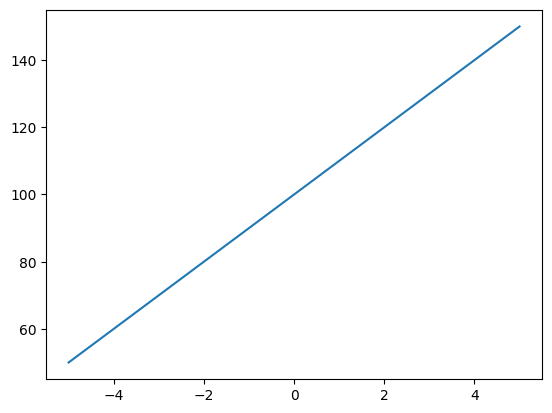

In [32]:
plt.plot(linspace(-5,5,100),linspace(50,150,100))

In [56]:
w0 = 0.7e-6
lmbda = 8.52e-7
zR = pi*w0**2/lmbda
Tfort = 2.5e-3
U0 = kB*Tfort
fr = (2/w0)*sqrt(U0/mRb)/(2*pi)
fz = (1/zR)*sqrt(2*U0/mRb)/(2*pi)
print("radial freq.", fr*1e-3, "kHz")
print("axial freq.", fz*1e-3, "kHz")

radial freq. 222.33317516218673 kHz
axial freq. 60.908927788837765 kHz


In [43]:
w0 = 0.7e-6
lmbda = 8.52e-7
zR = pi*w0**2/lmbda
Tfort = 1e-3
U0 = kB*Tfort
fr = (2/w0)*sqrt(U0/mRb)/(2*pi)
fz = (1/zR)*sqrt(2*U0/mRb)/(2*pi)
print("radial freq.", fr*1e-3, "kHz")
print("axial freq.", fz*1e-3, "kHz")

radial freq. 140.61584658593725 kHz
axial freq. 38.522188330290135 kHz


In [53]:
# conversion from frequency list to voltage list for control FM on the Rigol DG1022Z with Zotino
f_modulation_list = linspace(70,130,10)
FM_deviation = 30
f_carrier = 100
V_modulation_list = (f_modulation_list - f_carrier)*5/FM_deviation
V_modulation_list

array([-5.        , -3.88888889, -2.77777778, -1.66666667, -0.55555556,
        0.55555556,  1.66666667,  2.77777778,  3.88888889,  5.        ])

In [ ]:
f_modulation_list * 10/(2*FM_deviation) - 10

## photon scattering rate

In [3]:
delta = 2*pi*15e6
gamma = 2*pi*6e6
s = 6*9 # I/Isat for 6 beams, ignoring quantization axis of atom and interference
r=gamma*(0.5*s/(1+4*(delta/gamma)**2+s))/1e6
mirror =arcsin(0.61)/(2*pi)
fiber= 0.7
det = 0.7
bp = 0.9
r*mirror*fiber*det*bp

0.5858785092107289

In [6]:
# optical pumping
delta = 0# 2*pi*5e6
gamma = 2*pi*6e6
s = 1 # I/Isat for 6 beams, ignoring quantization axis of atom and interference
r=gamma*(0.5*s/(1+4*(delta/gamma)**2+s))
b = 3/24 # from Metcalf I=3/2, D1 line. branching into F=1,m=0 if we are pumping to F'=1
1/(r*b)

8.488263631567752e-07

In [7]:
#power needed for saturation
pi*(0.03)**2*4.484/2

0.006339105656413485

In [6]:
log10(gamma), log10(delta)

(7.576331118741758, 7.974271127413796)

## misc artiq testing

In [6]:
np.linspace(70,89,15)[4],np.linspace(70,89,15)[6]

(75.42857142857143, 78.14285714285714)

In [7]:
np.linspace(70,89,15)

array([70.        , 71.35714286, 72.71428571, 74.07142857, 75.42857143,
       76.78571429, 78.14285714, 79.5       , 80.85714286, 82.21428571,
       83.57142857, 84.92857143, 86.28571429, 87.64285714, 89.        ])

In [193]:
'atom_loading_experiment'

'atom_loading'

In [191]:
def foo(name=None):
    if name is not None:
        print(name)

test = lambda **kwargs: foo(**kwargs)
test({'name':'jim'})
test()

TypeError: <lambda>() takes 0 positional arguments but 1 was given

In [151]:
import foo1 as foo

In [152]:
dir(foo)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'myfunc1',
 'myfunc2',
 'np',
 'someclass']

In [184]:
xx = [x for x in dir(foo) if ('__' not in x and str(type(getattr(foo,x)))=="<class 'function'>")]
# xx = [x for x in dir(foo) if '__' not in x]
xx

['myfunc1', 'myfunc2']

In [178]:
ll = [type(getattr(foo,x)) for x in xx]
ll

[function, function, module, type]

In [182]:
str(ll[0])

"<class 'function'>"

In [10]:
t = iter([1,3,4])

In [16]:
t = t.__next__()

In [35]:
class changing_var:
    def __init__(self, iterable):
        self.vals = iterable
    def __repr__(self):
        return str(self.vals.__next__())

t = changing_var(iter([1,3,5,7]))

In [36]:
t

1

In [37]:
t

3

In [38]:
t

5

In [15]:
[(i,j) for i in range(3) for j in range(3)]

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

In [11]:
class Switch:
    def on(self):
        print("on!")
    def off(self):
        print("off!")
    
class Urukul:
    def __init__(self):
        self.sw = Switch()

dds = Urukul()
dds.sw.on_original =  dds.sw.on
def on_wrapper(sw):
    def wrapper():
        sw.on_original()
        sw.is_on = True
    return wrapper

dds.sw.on = on_wrapper(dds.sw)
dds.sw.on()
dds.sw.is_on

on!


True

In [3]:
error_history_length = 4
error_history_arr = full(error_history_length, 0.0)
error_buffer = full(error_history_length-1)

for i in range(error_history_length):
    err = random.rand()
    error_buffer = error_history_arr[-(error_history_length-1):]
    error_history_arr[:-1] = error_buffer
    error_history_arr[-1] = err
    print(error_history_arr)

[0.         0.         0.         0.38963246]
[0.         0.         0.38963246 0.73444101]
[0.         0.38963246 0.73444101 0.11718896]
[0.38963246 0.73444101 0.11718896 0.4319556 ]


In [8]:
error_history_length = 4
error_history_arr = full(error_history_length, 0.0)
error_buffer = full(error_history_length-1, 0.0)

for i in range(error_history_length):
    err = random.rand()

    print("last error array")
    print(error_history_arr)
    print("last buffer")
    print(error_buffer)
    for i in range(error_history_length-1):
        error_buffer[i] = error_history_arr[-(error_history_length-1):][i]
    print("buffer after updating with error array")
    print(error_buffer)
    error_history_arr[:-1] = error_buffer
    print("error array after updating with buffer")
    print(error_history_arr)
    error_history_arr[-1] = err
    print("error array after updating with current error")
    print(error_history_arr)

last error array
[0. 0. 0. 0.]
last buffer
[0. 0. 0.]
buffer after updating with error array
[0. 0. 0.]
error array after updating with buffer
[0. 0. 0. 0.]
error array after updating with current error
[0.         0.         0.         0.71576066]
last error array
[0.         0.         0.         0.71576066]
last buffer
[0. 0. 0.]
buffer after updating with error array
[0.         0.         0.71576066]
error array after updating with buffer
[0.         0.         0.71576066 0.71576066]
error array after updating with current error
[0.         0.         0.71576066 0.96051294]
last error array
[0.         0.         0.71576066 0.96051294]
last buffer
[0.         0.         0.71576066]
buffer after updating with error array
[0.         0.71576066 0.96051294]
error array after updating with buffer
[0.         0.71576066 0.96051294 0.96051294]
error array after updating with current error
[0.         0.71576066 0.96051294 0.99023889]
last error array
[0.         0.71576066 0.96051294 0.

In [12]:
avgs = 10
steps = 10
measure = 0.001
(.050+avgs*measure*6)*steps

1.1

In [18]:
amplitude = 1.0
code = int32(round(amplitude * 0x3fff))
if code < 0 or code > 0x3fff:
    raise ValueError("Invalid AD9910 fractional amplitude!")

In [48]:
class MyClass():

    def __init__(self, exp_ref):
        self.exp_ref = exp_ref

    self = 

    @staticmethod
    def foo(self):
        print("hi")

In [50]:
self =  5
MyClass.foo(self)

hi


## single atom loading cost function

C:\Users\QC\AppData\Local\Temp\ipykernel_11136\3914089899.py:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  poisson = lambda x, m: (m**x/np.math.factorial(x))*np.exp(-m)


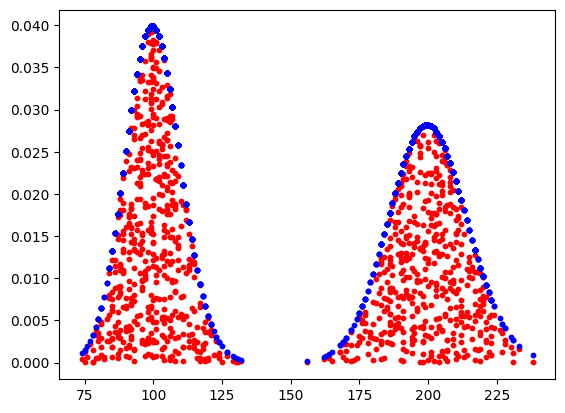

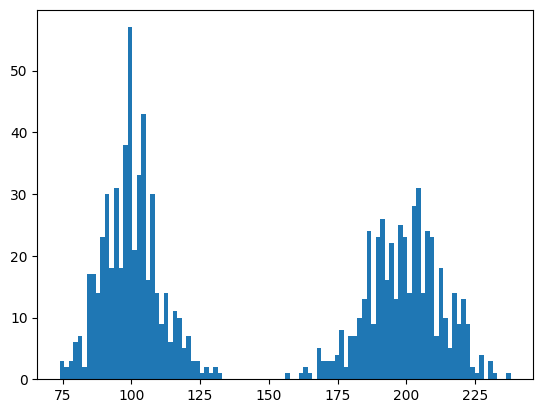

In [10]:
n = 1000 # number of measurements
domain = [0,500]
x1,x2 = domain

mu_bg = 100
mu_sig = 100 # the true signal mean
poisson = lambda x, m: (m**x/np.math.factorial(x))*np.exp(-m)

a = b = 0.5
func = lambda counts: 2*(a*poisson(counts, mu_bg) + b*poisson(counts, mu_sig+mu_bg))
# counts = range(1,600)
# plt.plot(counts, np.array([func(x) for x in counts]))

fmax = poisson(mu_bg, mu_bg) # the maximum
y_dist = np.empty(n) 
f_dist = np.empty(n)
x_dist = np.empty(n) # this is the distribution we want
j = 0 # dist index
while j < n:
    x = int((x2-x1)*np.random.rand()+0.5) # rand val on domain of f(x)
    f = func(x)
    y = np.random.rand()*fmax # rand val on range of f(x)
    if y <= f:
        y_dist[j]=y
        f_dist[j]=f
        x_dist[j]=x # x vals with approximate gaussian pdf
        j+=1

# check the generated pts
plt.scatter(x_dist,y_dist,c='red',s=10)
plt.scatter(x_dist,f_dist,c='blue',s=10)
plt.show()

# plot what we would want to see in lab
plt.hist(x_dist, bins=100)
plt.show()

C:\Users\QC\AppData\Local\Temp\ipykernel_11136\3580128463.py:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  poisson = lambda x, m: (m**x/np.math.factorial(x))*np.exp(-m)


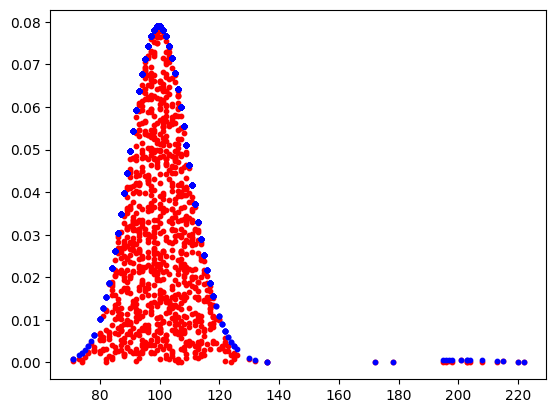

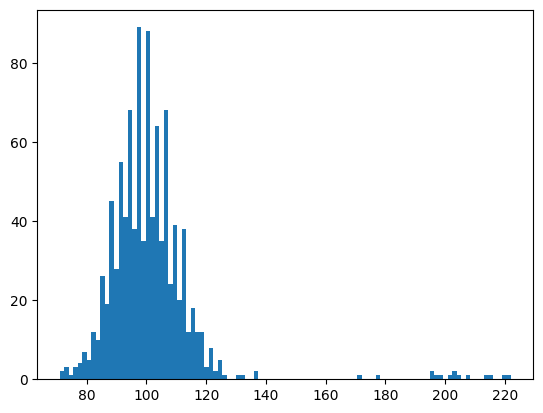

In [14]:
n = 1000 # number of measurements
domain = [0,500]
x1,x2 = domain

mu_bg = 100
mu_sig = 100 # the true signal mean
poisson = lambda x, m: (m**x/np.math.factorial(x))*np.exp(-m)

a = 0.99 # the background fraction. kind of
b = 1 - a
func = lambda counts: 2*(a*poisson(counts, mu_bg) + b*poisson(counts, mu_sig+mu_bg))
# counts = range(1,600)
# plt.plot(counts, np.array([func(x) for x in counts]))

fmax = 2*a*poisson(mu_bg, mu_bg) # the maximum
y_dist = np.empty(n) 
f_dist = np.empty(n)
x_dist = np.empty(n) # this is the distribution we want
j = 0 # dist index
while j < n:
    x = int((x2-x1)*np.random.rand()+0.5) # rand val on domain of f(x)
    f = func(x)
    y = np.random.rand()*fmax # rand val on range of f(x)
    if y <= f:
        y_dist[j]=y
        f_dist[j]=f
        x_dist[j]=x # x vals with approximate gaussian pdf
        j+=1

# check the generated pts
plt.scatter(x_dist,y_dist,c='red',s=10)
plt.scatter(x_dist,f_dist,c='blue',s=10)
plt.show()

# plot what we would want to see in lab
plt.hist(x_dist, bins=100)
plt.show()

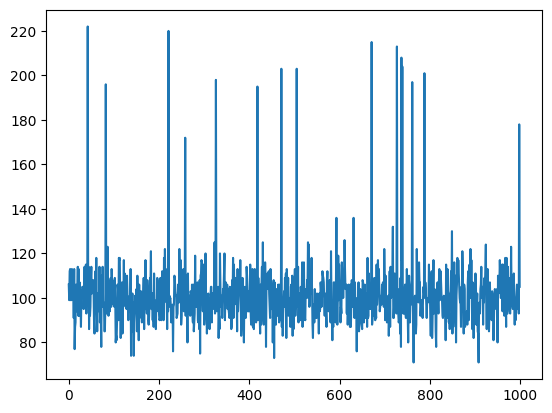

In [15]:
plt.plot(x_dist)

In [18]:
# the most straightforward cost function that captures what we want is the number of loading events
cost = lambda data: -len(data[data > threshold])

In [17]:
threshold = 160
data = x_dist


array([222., 196., 220., 172., 198., 195., 203., 203., 215., 213., 208.,
       204., 197., 201., 178.])

In [ ]:
# plot the cost vs atom loading fraction (roughly). should be nearly linear

# the most straightforward cost function that captures what we want is the number of loading events
cost = lambda data: -len(data[data > threshold])

# if we want even the detection of one event to have a significant effect, in case the loading has gone away completely,
# we could add in some nonlinearity

n = 1000 # number of measurements
domain = [0,500]
x1,x2 = domain

mu_bg = 100
mu_sig = 100 # the true signal mean
poisson = lambda x, m: (m**x/np.math.factorial(x))*np.exp(-m)

cost_list = []
b_pts = np.linspace(0,0.5,50) # the fractional height of the background mode.
                              # not the same as the fraction of background events but close enough as a proxy
for b in b_pts:
    a = 1 - b # the background fraction. kind of
    func = lambda counts: 2*(a*poisson(counts, mu_bg) + b*poisson(counts, mu_sig+mu_bg))
    # counts = range(1,600)
    # plt.plot(counts, np.array([func(x) for x in counts]))
    
    fmax = 2*a*poisson(mu_bg, mu_bg) # the maximum
    y_dist = np.empty(n) 
    f_dist = np.empty(n)
    x_dist = np.empty(n) # this is the distribution we want
    j = 0 # dist index
    while j < n:
        x = int((x2-x1)*np.random.rand()+0.5) # rand val on domain of f(x)
        f = func(x)
        y = np.random.rand()*fmax # rand val on range of f(x)
        if y <= f:
            y_dist[j]=y
            f_dist[j]=f
            x_dist[j]=x # x vals with approximate gaussian pdf
            j+=1
    
    # # check the generated pts
    # plt.scatter(x_dist,y_dist,c='red',s=10)
    # plt.scatter(x_dist,f_dist,c='blue',s=10)
    # plt.show()
    
    # # plot what we would want to see in lab
    # plt.hist(x_dist, bins=100)
    # plt.show()

    cost_list.append(cost(x_dist))

Text(0.5, 0, 'background fraction')

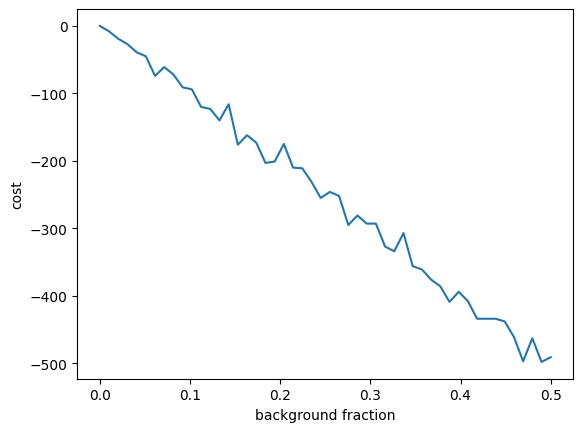

In [21]:
plt.plot(b_pts,cost_list)
plt.ylabel("cost")
plt.xlabel("background fraction")

In [22]:
# if we're loading atoms in continuous mode, and an atom stays in the trap the whole time, it can look like we're getting > 50% loading. so if the apparent number of loading events goes exceeds 50%,
# the cost should rise again

Text(0.5, 0, 'events above threshold')

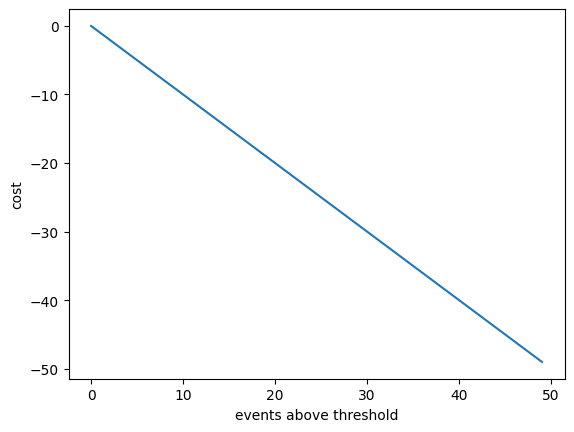

In [29]:
atom_events = np.arange(50)
plt.plot(atom_events,-atom_events)
plt.ylabel("cost")
plt.xlabel("events above threshold")

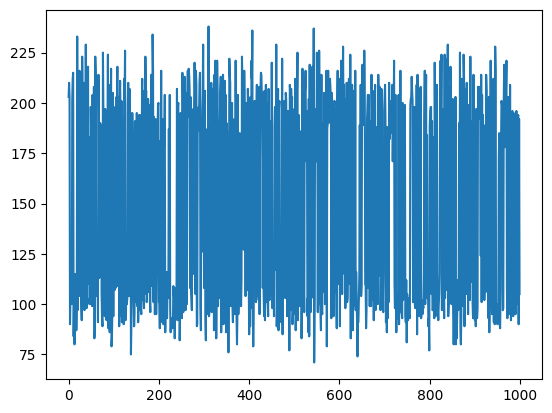

In [30]:
plt.plot(x_dist)

C:\Users\QC\AppData\Local\Temp\ipykernel_11136\2191682942.py:17: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  poisson = lambda x, m: (m**x/np.math.factorial(x))*np.exp(-m)


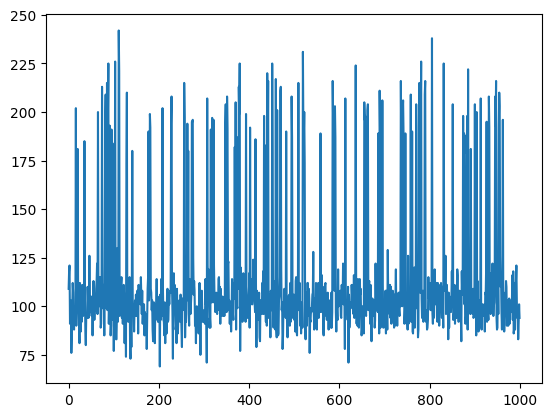

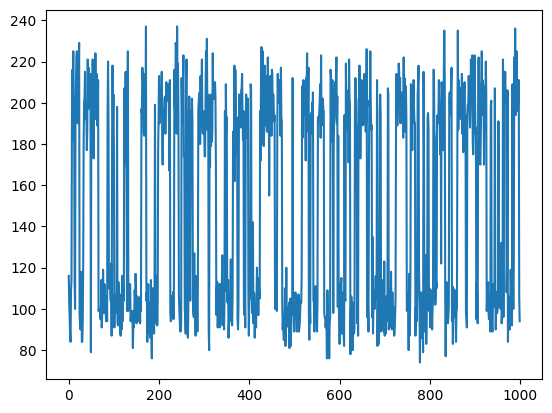

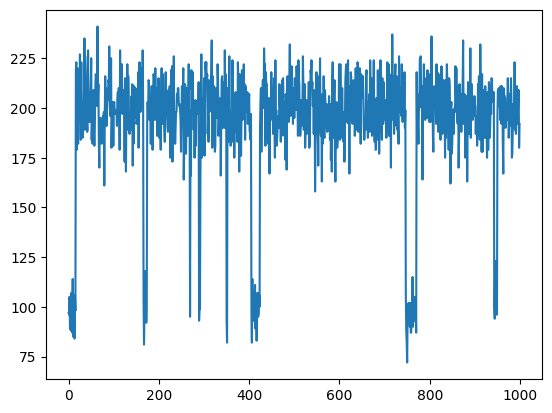

In [101]:
# generate atom loading in steady state, where an SPCM exposure following one which indicated an atom
# is more likely to still have an atom than it would be if there were no atom previously

# the most straightforward cost function that captures what we want is the number of loading events
cost = lambda data: -len(data[data > threshold])

# if we want even the detection of one event to have a significant effect, in case the loading has gone away completely,
# we could add in some nonlinearity

n = 1000 # number of measurements
domain = [0,500]
x1,x2 = domain

mu_bg = 100
mu_sig = 100 # the true signal mean
q_threshold = 150 # the threshold for classifying an event as atom vs background
poisson = lambda x, m: (m**x/np.math.factorial(x))*np.exp(-m)

cost_list = []
b_pts = np.linspace(0,0.5,50) # the fractional height of the atom mode
                              # not the same as the fraction of atom events but close enough as a proxy

b = 0.1 # relative likelihood of loading an atom

q = 0 # whether an atom was detected in the last exposure
for tau in [1,10,100]: # the 1/e lifetime of a trapped atom, in units detection events
    
    a = 1 - b
    func = lambda counts, atom: 2*((a if not atom else 1-exp(-1/tau))*poisson(counts, mu_bg) + 
                                   (b if not atom else exp(-1/tau))*poisson(counts, mu_sig+mu_bg))
    
    y_dist = np.empty(n)
    f_dist = np.empty(n)
    x_dist = np.empty(n) # this is the distribution we want
    j = 0 # dist index
    while j < n:
        fmax = 2*max((a if not q else 1-exp(-1/tau))*poisson(mu_bg, mu_bg),
                     (b if not q else exp(-1/tau))*poisson(mu_sig+mu_bg, mu_sig+mu_bg)) # the maximum

        x = int((x2-x1)*np.random.rand()+0.5) # rand val on domain of f(x)
        f = func(x,q)
        y = np.random.rand()*fmax # rand val on range of f(x)
        if y <= f:
            y_dist[j]=y
            f_dist[j]=f
            x_dist[j]=x # x vals with approximate gaussian pdf
            q = 1 if x > q_threshold else 0
            j+=1
    
    # # check the generated pts
    # plt.scatter(x_dist,y_dist,c='red',s=10)
    # plt.scatter(x_dist,f_dist,c='blue',s=10)
    # plt.show()
    
    # # plot what we would want to see in lab
    # plt.hist(x_dist, bins=100)
    # plt.show()

    # plot the detection event time series
    plt.plot(x_dist)
    plt.show()

    cost_list.append(cost(x_dist))

In [91]:
# if we get either a string of loading events or a string of no loading events, that's not good.
# in steady state, good loading will likely have losts of collisional losses, so we switch
# rapidly between atom and no atom.

# compute the average sequency length for either type of event
q = 0 # no atom
q_last = q
sequence_length_list = []
sequence_length = 0
test = [200]*5 + [75]*5

data = test

data = x_dist

q = np.zeros(len(data))
atom_events = 0
q_last = (data[0] > q_threshold)
for i in range(len(data)):
    x = data[i]
    q[i] = (x > q_threshold)
    atom_events += q[i]
    if q[i] == q_last:
        sequence_length += 1
    else:
        sequence_length_list.append(sequence_length)
        sequence_length = 1
    q_last = q[i]
sequence_length_list.append(sequence_length)

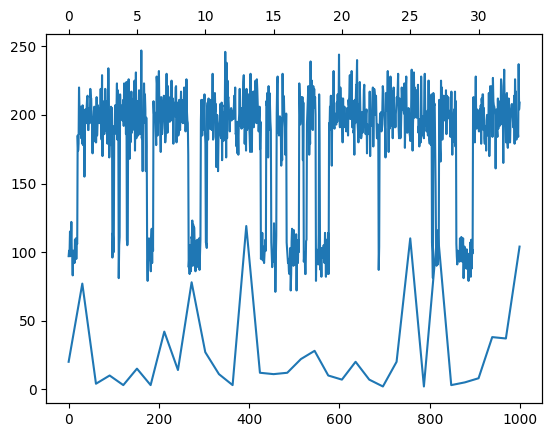

In [92]:
fig,ax = plt.subplots()
ax.plot(data)
ax2 = ax.twiny()
ax2.plot(sequence_length_list)

In [93]:
np.mean(sequence_length_list), atom_events

(29.41176470588235, 790.0)

Text(0.5, 1.0, 'atoms loaded: 8')

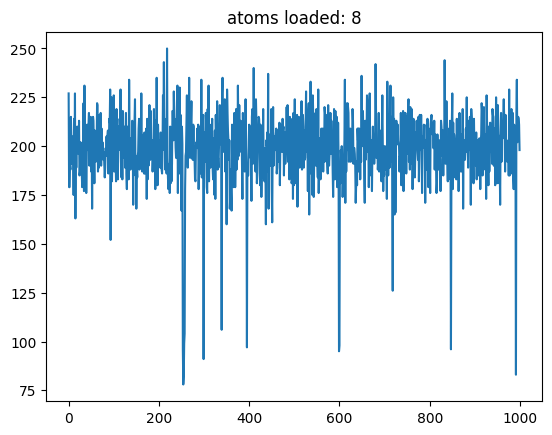

In [117]:
# when the signal goes high and stays high, we need to count that as only a single loading event

# compute the average sequency length for either type of event
q = 0 # no atom
q_last = q
sequence_length_list = []
sequence_length = 0
test = [200]*5 + [75]*5

data = test

data = x_dist

# q = np.zeros(len(data))
# atom_events = 0
# atoms_loaded = 0
# q_last = (data[0] > q_threshold)
# for i in range(len(data)):
#     x = data[i]
#     q[i] = (x > q_threshold)
#     atom_events += q[i]
#     if q[i] == q_last:
#         sequence_length += 1
#     else:
#         sequence_length_list.append(sequence_length)
#         sequence_length = 1
#         if q_last == 1:
#             atoms_loaded += 1
#     q_last = q[i]
# sequence_length_list.append(sequence_length)

# counts the number of atoms loaded rather than number of sequences or above threshold events,
# assuming that the signal remaining above threshold constitutes one atom loaded
q = 0
atoms_loaded = 0
q_last = (data[0] > q_threshold)
for x in data[1:]:
    q = x > q_threshold
    if q != q_last and q_last:
        atoms_loaded += 1
    q_last = q

fig,ax = plt.subplots()
ax.plot(data)
ax.set_title(f"atoms loaded: {atoms_loaded}")

In [118]:
# the cost should be worse when the average sequency length is long

def cost(data):
    """return -1*(number of atoms loaded)"""
    q = 0
    atoms_loaded = 0
    q_last = (data[0] > q_threshold)
    for x in data[1:]:
        q = x > q_threshold
        if q != q_last and q_last:
            atoms_loaded += 1
        q_last = q
    return -1*atoms_loaded

# generate atom loading in steady state, where an SPCM exposure following one which indicated an atom
# is more likely to still have an atom than it would be if there were no atom previously

n = 1000 # number of measurements
domain = [0,500]
x1,x2 = domain

mu_bg = 100
mu_sig = 100 # the true signal mean
q_threshold = 150 # the threshold for classifying an event as atom vs background
poisson = lambda x, m: (m**x/np.math.factorial(x))*np.exp(-m)

counts_list = []

b_pts = np.linspace(0,0.5,5) # the fractional height of the atom mode
                              # not the same as the fraction of atom events but close enough as a proxy

tau_pts = [1,10,50,100] # the 1/e lifetime of a trapped atom, in units detection events (measurements)

for b in b_pts:
    for tau in tau_pts:
        
        a = 1 - b
        func = lambda counts, atom: 2*((a if not atom else 1-exp(-1/tau))*poisson(counts, mu_bg) + 
                                       (b if not atom else exp(-1/tau))*poisson(counts, mu_sig+mu_bg))
        
        y_dist = np.empty(n)
        f_dist = np.empty(n)
        x_dist = np.empty(n) # this is the distribution we want
        j = 0 # dist index
        while j < n:
            fmax = 2*max((a if not q else 1-exp(-1/tau))*poisson(mu_bg, mu_bg),
                         (b if not q else exp(-1/tau))*poisson(mu_sig+mu_bg, mu_sig+mu_bg)) # the maximum
    
            x = int((x2-x1)*np.random.rand()+0.5) # rand val on domain of f(x)
            f = func(x,q)
            y = np.random.rand()*fmax # rand val on range of f(x)
            if y <= f:
                y_dist[j]=y
                f_dist[j]=f
                x_dist[j]=x # x vals with approximate gaussian pdf
                q = 1 if x > q_threshold else 0
                j+=1
        
        # # check the generated pts
        # plt.scatter(x_dist,y_dist,c='red',s=10)
        # plt.scatter(x_dist,f_dist,c='blue',s=10)
        # plt.show()
        
        # # plot what we would want to see in lab
        # plt.hist(x_dist, bins=100)
        # plt.show()
    
        # plot the detection event time series
        # plt.plot(x_dist)
        # plt.show()
    
        counts_list.append(x_dist)

C:\Users\QC\AppData\Local\Temp\ipykernel_11136\2014203188.py:25: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  poisson = lambda x, m: (m**x/np.math.factorial(x))*np.exp(-m)


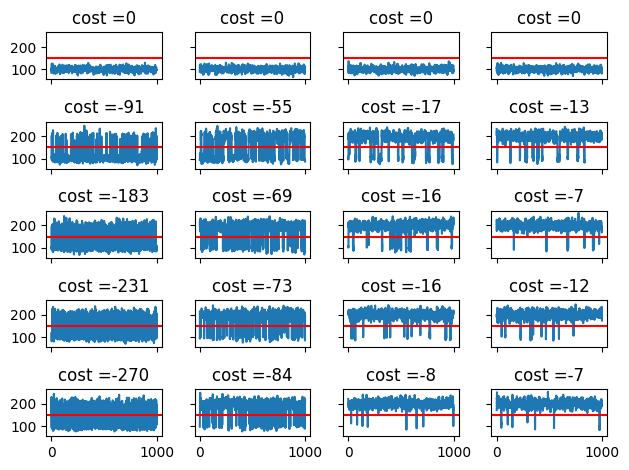

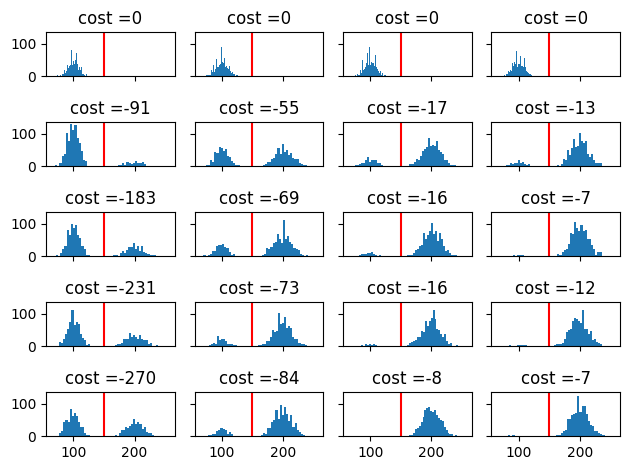

In [122]:
fig, axes = plt.subplots(ncols=len(tau_pts),nrows=len(b_pts),sharex=True,sharey=True)
for ax, data in zip(axes.flat, counts_list):
    ax.plot(data)
    ax.set_title(f"cost ={cost(data)}")
    ax.axhline(q_threshold,linestyle='-',color='r')
fig.tight_layout()
plt.savefig('atom_loading_cost_simulation_20240116.pdf',bbox_inches='tight')
plt.show()

fig, axes = plt.subplots(ncols=len(tau_pts),nrows=len(b_pts),sharex=True,sharey=True)
for ax, data in zip(axes.flat, counts_list):
    ax.hist(data,bins=50)
    ax.set_title(f"cost ={cost(data)}")
    ax.axvline(q_threshold,linestyle='-',color='r')
fig.tight_layout()
plt.savefig('atom_loading_cost_simulation_hist_20240116.pdf',bbox_inches='tight')
plt.show()


In [132]:
0.211+np.linspace(-0.1,0.1,25)

array([0.111     , 0.11933333, 0.12766667, 0.136     , 0.14433333,
       0.15266667, 0.161     , 0.16933333, 0.17766667, 0.186     ,
       0.19433333, 0.20266667, 0.211     , 0.21933333, 0.22766667,
       0.236     , 0.24433333, 0.25266667, 0.261     , 0.26933333,
       0.27766667, 0.286     , 0.29433333, 0.30266667, 0.311     ])

In [133]:
for dV in np.linspace(-0.1,0.1,25):
    print(3.813+dV)

3.713
3.7213333333333334
3.7296666666666667
3.738
3.7463333333333333
3.754666666666667
3.7630000000000003
3.7713333333333336
3.779666666666667
3.7880000000000003
3.7963333333333336
3.804666666666667
3.813
3.8213333333333335
3.8296666666666668
3.838
3.8463333333333334
3.8546666666666667
3.863
3.8713333333333333
3.879666666666667
3.8880000000000003
3.8963333333333336
3.904666666666667
3.9130000000000003


In [9]:
np.array((0.149,0.078,0.16,0.181))*0.8

array([0.1192, 0.0624, 0.128 , 0.1448])

In [11]:
np.array([0.131, 0.055, 0.12 , 0.165])*0.8

array([0.1048, 0.044 , 0.096 , 0.132 ])